In [108]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.style.use('seaborn')

In [74]:
%time
df2016 = pd.read_csv('Taxi_Trips_May2017.csv')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 31.9 µs


In [ ]:
df2017.shape

In [76]:
df2016.head(5)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type
0,8ae798cf467f4135bfda9f2380a7fdf2b0dacf27,7ed122481c0964a5555309bf4696e25bbf7def086d7ecb...,05/18/2017 08:00:00 PM,05/18/2017 08:15:00 PM,540.0,0.0,8.0,8.0,7.00,2.0,0.0,0.0,9.00,Credit Card
1,8ae7a5d1c3216810bc1233c2b277123ce5051c5d,21644e2c146605fd85017fc07a3c15ebcffd7ba491f41c...,05/06/2017 07:15:00 PM,05/06/2017 07:15:00 PM,420.0,0.0,77.0,3.0,6.25,1.0,0.0,1.5,8.75,Credit Card
2,8ae7dd65d2bf100bacd0aa0d88c9eb6b54170fbf,fd8d8fc9b08d23876626a5e7f8fb72e2c340d8755135a1...,05/23/2017 04:45:00 PM,05/23/2017 04:45:00 PM,420.0,0.9,28.0,32.0,6.25,2.0,0.0,0.0,8.75,Credit Card
3,8ae7df9ed8297fd43da24bc71613fc6f00a6b04e,144f6db98ba2bd667e131e37ed5b79fe44416ebe9337f5...,05/25/2017 12:15:00 AM,05/25/2017 12:30:00 AM,1380.0,17.6,76.0,8.0,44.00,1.0,0.0,4.0,49.50,Credit Card
4,8ae7e6b9e098786c945d6934cb21fe497f0b7a09,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,05/18/2017 03:45:00 PM,05/18/2017 03:45:00 PM,0.0,0.0,76.0,76.0,3.25,0.0,0.0,62.0,65.25,Credit Card


In [77]:
df2016.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type'],
      dtype='object')

In [78]:
df2016['Payment Type'].value_counts()

Cash           558555
Credit Card    532167
No Charge        5655
Unknown          3227
Dispute           917
Prcard            786
Pcard             543
Mobile             92
Name: Payment Type, dtype: int64

In [79]:
df2016['Pickup Community Area'].value_counts()

8.0     351819
32.0    281715
28.0     89479
76.0     88258
6.0      46491
7.0      32059
33.0     31334
56.0     18411
24.0     17951
3.0      11246
77.0      8394
22.0      5105
16.0      3303
2.0       3217
1.0       3074
5.0       2893
4.0       2630
41.0      2554
14.0      1857
11.0      1624
21.0      1612
34.0      1071
59.0       965
15.0       850
35.0       848
39.0       807
10.0       598
31.0       509
13.0       466
23.0       321
         ...  
71.0        88
58.0        79
68.0        70
29.0        69
37.0        56
65.0        54
49.0        53
62.0        49
46.0        49
67.0        45
51.0        44
73.0        43
48.0        40
64.0        39
45.0        36
18.0        35
26.0        34
57.0        27
63.0        27
66.0        25
75.0        23
53.0        22
9.0         17
50.0        13
72.0        12
74.0         8
52.0         5
55.0         5
47.0         4
54.0         1
Name: Pickup Community Area, Length: 77, dtype: int64

In [138]:
# highest pickup is from River North. Let's explore this dataset 
df_NearNorth = df2016[df2016['Pickup Community Area']==8.0]

In [139]:
# what's the demand like in Near North based on day of week 
df_NearNorth.Day_Of_Week.value_counts()

4    57603
1    54998
5    50762
3    50452
2    50385
0    46759
6    40860
Name: Day_Of_Week, dtype: int64

In [142]:
# Demand in Near North based on hour of day
df_NearNorth.Start_Hour.value_counts()

18    24080
19    23552
20    21838
17    21638
21    19742
16    19377
14    18953
13    18795
15    18735
22    18018
12    17693
11    16217
9     15978
10    15795
23    14380
8     13160
0     11458
1      9462
2      8263
7      7610
3      6135
4      4310
6      3721
5      2909
Name: Start_Hour, dtype: int64

In [82]:
# Trips end up from O'Hare. Let's explore this dataset 
df_OHareDest = df2016[df2016['Dropoff Community Area']==76.0]

In [95]:
# Change to datetime format for trip start and trip end, remove original timestamp
df2016['Trip_Start']=pd.to_datetime(df2016['Trip Start Timestamp'])
df2016['Trip_End']=pd.to_datetime(df2016['Trip End Timestamp'])
df2016.drop('Trip Start Timestamp', axis=1, inplace=True)
df2016.drop('Trip End Timestamp',axis=1, inplace=True)

In [140]:
df2016.head(5)

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Trip_Start,Trip_End,Day_Of_Week,Start_Hour
0,8ae798cf467f4135bfda9f2380a7fdf2b0dacf27,7ed122481c0964a5555309bf4696e25bbf7def086d7ecb...,540.0,0.0,8.0,8.0,7.00,2.0,0.0,0.0,9.00,Credit Card,2017-05-18 20:00:00,2017-05-18 20:15:00,3,20
1,8ae7a5d1c3216810bc1233c2b277123ce5051c5d,21644e2c146605fd85017fc07a3c15ebcffd7ba491f41c...,420.0,0.0,77.0,3.0,6.25,1.0,0.0,1.5,8.75,Credit Card,2017-05-06 19:15:00,2017-05-06 19:15:00,5,19
2,8ae7dd65d2bf100bacd0aa0d88c9eb6b54170fbf,fd8d8fc9b08d23876626a5e7f8fb72e2c340d8755135a1...,420.0,0.9,28.0,32.0,6.25,2.0,0.0,0.0,8.75,Credit Card,2017-05-23 16:45:00,2017-05-23 16:45:00,1,16
3,8ae7df9ed8297fd43da24bc71613fc6f00a6b04e,144f6db98ba2bd667e131e37ed5b79fe44416ebe9337f5...,1380.0,17.6,76.0,8.0,44.00,1.0,0.0,4.0,49.50,Credit Card,2017-05-25 00:15:00,2017-05-25 00:30:00,3,0
4,8ae7e6b9e098786c945d6934cb21fe497f0b7a09,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,0.0,0.0,76.0,76.0,3.25,0.0,0.0,62.0,65.25,Credit Card,2017-05-18 15:45:00,2017-05-18 15:45:00,3,15


In [97]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101942 entries, 0 to 1101941
Data columns (total 14 columns):
Trip ID                   1101942 non-null object
Taxi ID                   1101221 non-null object
Trip Seconds              1101867 non-null float64
Trip Miles                1101926 non-null float64
Pickup Community Area     1015431 non-null float64
Dropoff Community Area    991604 non-null float64
Fare                      1101921 non-null float64
Tips                      1101921 non-null float64
Tolls                     1101921 non-null float64
Extras                    1101921 non-null float64
Trip Total                1101921 non-null float64
Payment Type              1101942 non-null object
Trip_Start                1101942 non-null datetime64[ns]
Trip_End                  1101875 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(9), object(3)
memory usage: 117.7+ MB


In [105]:
# Segment the number of trips based on day of the week 
df2016['Day_Of_Week'] = df2016.Trip_Start.dt.dayofweek

In [120]:
df2016.Day_Of_Week.value_counts()

1    186436
4    176304
3    166895
2    165962
0    163532
5    132081
6    110732
Name: Day_Of_Week, dtype: int64

In [117]:
type(travel_by_day)

pandas.core.series.Series

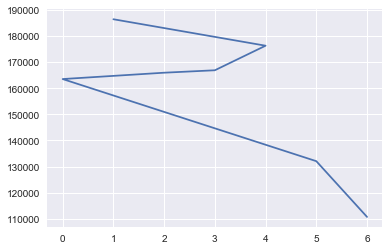

In [122]:
plt.plot(travel_by_day)

In [123]:
# Let's look at weekend rides, specifically, rides on Sunday.
df_Sunday = df2016[df2016['Day_Of_Week']==6]

In [126]:
df_Sunday['Dropoff Community Area'].value_counts()

8.0     33244
32.0    15691
6.0      7789
28.0     7440
7.0      6471
33.0     5370
24.0     5041
76.0     3892
3.0      2125
22.0     1712
77.0     1389
56.0     1210
5.0       933
4.0       802
16.0      670
1.0       654
2.0       535
21.0      499
14.0      483
41.0      470
34.0      366
31.0      293
23.0      221
15.0      216
35.0      204
10.0      193
60.0      181
11.0      147
39.0      144
19.0      128
        ...  
40.0       27
69.0       27
44.0       26
26.0       26
57.0       25
64.0       25
70.0       25
29.0       25
68.0       23
71.0       20
46.0       18
63.0       17
72.0       15
49.0       15
66.0       14
37.0       13
65.0       11
74.0       11
67.0       11
48.0       11
73.0       11
45.0       10
51.0        9
75.0        9
18.0        7
62.0        6
53.0        4
50.0        2
52.0        2
47.0        1
Name: Dropoff Community Area, Length: 75, dtype: int64

In [127]:
df2016['Start_Hour']=df2016['Trip_Start'].dt.hour

In [129]:
df2016.Start_Hour.value_counts()

18    77125
17    73882
19    73611
16    67424
20    64300
15    62250
14    61230
13    60972
12    59702
21    56866
9     54590
11    53736
22    52697
10    51642
8     44837
23    42716
0     31482
7     25291
1     24178
2     19054
3     13906
6     12063
4      9991
5      8397
Name: Start_Hour, dtype: int64

In [136]:
# Where are people calling rides at 6pm? 
df_6pm = df2016[df2016['Start_Hour']==18]
df_6pm['Pickup Community Area'].value_counts()

32.0    24118
8.0     24080
28.0     6170
76.0     5577
33.0     2748
6.0      2222
7.0      1673
56.0     1126
24.0      855
3.0       515
77.0      374
16.0      258
22.0      235
2.0       167
5.0       154
4.0       150
41.0      144
1.0       116
11.0       73
14.0       63
21.0       58
34.0       44
15.0       36
35.0       32
70.0       28
13.0       28
10.0       25
27.0       25
31.0       22
39.0       19
        ...  
60.0       15
23.0       10
43.0        9
42.0        7
36.0        6
61.0        5
58.0        5
17.0        5
19.0        4
30.0        4
63.0        3
49.0        3
73.0        3
44.0        3
37.0        3
25.0        3
59.0        3
66.0        3
29.0        3
40.0        3
20.0        3
75.0        2
57.0        2
55.0        1
65.0        1
48.0        1
71.0        1
69.0        1
68.0        1
74.0        1
Name: Pickup Community Area, Length: 62, dtype: int64

In [137]:
# Where are people calling rides at 9am? 
df_9am = df2016[df2016['Start_Hour']==9]
df_9am['Pickup Community Area'].value_counts()

8.0     15978
32.0    13279
28.0     7921
76.0     3708
6.0      1987
7.0      1703
33.0     1198
56.0      861
3.0       664
77.0      593
24.0      478
2.0       190
59.0      159
41.0      151
1.0       138
16.0      126
5.0       120
4.0       110
22.0      108
35.0      102
39.0       89
14.0       67
11.0       53
21.0       49
15.0       35
34.0       25
10.0       24
31.0       20
13.0       17
43.0       15
        ...  
27.0        8
65.0        8
69.0        8
68.0        7
64.0        6
44.0        6
30.0        6
19.0        5
12.0        5
40.0        5
17.0        5
53.0        5
71.0        5
26.0        4
61.0        4
36.0        4
51.0        3
62.0        3
52.0        2
73.0        2
18.0        2
29.0        2
49.0        2
37.0        2
57.0        1
20.0        1
9.0         1
45.0        1
63.0        1
70.0        1
Name: Pickup Community Area, Length: 68, dtype: int64

## 2015 May Analysis

In [98]:
df15 = pd.read_csv('Taxi_Trips_May2015.csv')

In [143]:
df15.shape

(2503945, 14)

In [71]:
df_OHareDest2 = df2[df2['Dropoff Community Area']==76.0]

In [73]:
df_OHareDest2['Pickup Community Area'].value_counts()

8.0     29564
32.0    20974
76.0    12022
6.0      3886
28.0     3818
33.0     3010
7.0      2691
24.0     1332
3.0       892
77.0      816
5.0       706
22.0      595
41.0      484
56.0      461
4.0       434
16.0      387
1.0       321
2.0       259
11.0      209
14.0      189
21.0      181
10.0      177
39.0      117
15.0      113
13.0       92
35.0       72
12.0       67
17.0       54
31.0       40
34.0       38
        ...  
43.0        9
18.0        7
61.0        7
36.0        7
30.0        5
70.0        4
44.0        4
40.0        3
62.0        3
72.0        3
50.0        3
48.0        3
64.0        2
68.0        2
37.0        2
75.0        2
58.0        2
65.0        2
29.0        2
49.0        2
45.0        1
69.0        1
66.0        1
54.0        1
47.0        1
67.0        1
74.0        1
71.0        1
63.0        1
46.0        1
Name: Pickup Community Area, Length: 71, dtype: int64

In [99]:
# Change to datetime format for trip start and trip end, remove original timestamp
tlindf15['Trip_End']=pd.to_datetime(df15['Trip End Timestamp'])
df15.drop('Trip Start Timestamp', axis=1, inplace=True)
df15.drop('Trip End Timestamp',axis=1, inplace=True)

## Check for Coordinates

In [144]:
df = pd.read_csv('Taxi_Trips_Coordinates_2017.csv')

In [145]:
df.head(5)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
0,8ae798cf467f4135bfda9f2380a7fdf2b0dacf27,7ed122481c0964a5555309bf4696e25bbf7def086d7ecb...,05/18/2017 08:00:00 PM,05/18/2017 08:15:00 PM,540.0,0.0,8.0,8.0,$7.00,$2.00,$0.00,$0.00,$9.00,Credit Card,41.892073,-87.628874,41.898332,-87.620763
1,8ae7a5d1c3216810bc1233c2b277123ce5051c5d,21644e2c146605fd85017fc07a3c15ebcffd7ba491f41c...,05/06/2017 07:15:00 PM,05/06/2017 07:15:00 PM,420.0,0.0,77.0,3.0,$6.25,$1.00,$0.00,$1.50,$8.75,Credit Card,41.986712,-87.663416,41.965812,-87.655879
2,8ae7dd65d2bf100bacd0aa0d88c9eb6b54170fbf,fd8d8fc9b08d23876626a5e7f8fb72e2c340d8755135a1...,05/23/2017 04:45:00 PM,05/23/2017 04:45:00 PM,420.0,0.9,28.0,32.0,$6.25,$2.00,$0.00,$0.00,$8.75,Credit Card,41.885300,-87.642808,41.884987,-87.620993
3,8ae7df9ed8297fd43da24bc71613fc6f00a6b04e,144f6db98ba2bd667e131e37ed5b79fe44416ebe9337f5...,05/25/2017 12:15:00 AM,05/25/2017 12:30:00 AM,1380.0,17.6,76.0,8.0,$44.00,$1.00,$0.00,$4.00,$49.50,Credit Card,41.979071,-87.903040,41.890922,-87.618868
4,8ae7e6b9e098786c945d6934cb21fe497f0b7a09,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,05/18/2017 03:45:00 PM,05/18/2017 03:45:00 PM,0.0,0.0,76.0,76.0,$3.25,$0.00,$0.00,$62.00,$65.25,Credit Card,41.979071,-87.903040,41.979071,-87.903040


In [161]:
df.columns = df.columns.str.replace(" ","_")

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101942 entries, 0 to 1101941
Data columns (total 18 columns):
Trip_ID                       1101942 non-null object
Taxi_ID                       1101221 non-null object
Trip_Start_Timestamp          1101942 non-null object
Trip_End_Timestamp            1101875 non-null object
Trip_Seconds                  1101867 non-null float64
Trip_Miles                    1101926 non-null float64
Pickup_Community_Area         1015431 non-null float64
Dropoff_Community_Area        991604 non-null float64
Fare                          1101921 non-null object
Tips                          1101921 non-null object
Tolls                         1101921 non-null object
Extras                        1101921 non-null object
Trip_Total                    1101921 non-null object
Payment_Type                  1101942 non-null object
Pickup_Centroid_Latitude      1015440 non-null float64
Pickup_Centroid_Longitude     1015440 non-null float64
Dropoff_Centroid_L

In [175]:
df_pickup_lat = pd.DataFrame(df.groupby('Pickup_Community_Area').Pickup_Centroid_Latitude.mean())
df_pickup_long = pd.DataFrame(df.groupby('Pickup_Community_Area').Pickup_Centroid_Longitude.mean())

In [191]:
df_pickup_lat.reset_index(inplace=True)
df_pickup_long.reset_index(inplace=True)

In [193]:
df_loc = pd.merge(df_pickup_lat, df_pickup_long, how = 'outer')

In [196]:
df_loc.drop('index',axis=1,inplace=True)

In [199]:
df_loc.columns

Index(['Pickup_Community_Area', 'Pickup_Centroid_Latitude',
       'Pickup_Centroid_Longitude'],
      dtype='object')

In [222]:
df_loc

,Pickup_Community_Area,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,location
0,1.0,42.009479,-87.670198,"41.892072635,-87.62887415700001"
1,2.0,42.001438,-87.694972,"41.986711799999995,-87.663416405"
2,3.0,41.965694,-87.655748,"41.885300021999996,-87.642808466"
3,4.0,41.975138,-87.687522,"41.97907082,-87.90303966100001"
4,5.0,41.947884,-87.683824,"41.97907082,-87.90303966100001"
5,6.0,41.944285,-87.654818,"41.922686284,-87.649488729"
6,7.0,41.921658,-87.645896,"41.97907082,-87.90303966100001"
7,8.0,41.895923,-87.628019,"41.880994471,-87.632746489"
8,9.0,42.007613,-87.813781,"41.907520075,-87.62665890000001"
9,10.0,41.985015,-87.804532,"41.880994471,-87.632746489"


In [221]:
def convert_long_lat_to_format(row):
    return str(row['Pickup_Centroid_Latitude'])+','+str(row['Pickup_Centroid_Longitude'])
df_loc['location'] = df.apply(lambda row: convert_long_lat_to_format(row), axis=1)

In [230]:
import googlemaps
from datetime import datetime
import pprint

gmaps = googlemaps.Client(key='key')

In [231]:
sample =gmaps.distance_matrix((41.892072635,-87.62887415700001),[(41.890922026,-87.618868355),(41.89503345,-87.61971067200001)])

In [234]:
sample.keys()

dict_keys(['destination_addresses', 'origin_addresses', 'rows', 'status'])

In [241]:
help(pprint.pprint)

Help on function pprint in module pprint:

pprint(object, stream=None, indent=1, width=80, depth=None, *, compact=False)
    Pretty-print a Python object to a stream [default is sys.stdout].



In [ ]:
googlemaps.distance_matrix